<a href="https://colab.research.google.com/github/sigurdee/FDA-project/blob/main/Group_prjoject_FDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Travel Insurance Prediction**

Group Project, Fundamentals of Data Science 

In [19]:
import math
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pylab as pl # for plotting normalized distributions
import pandas as pd # lets us handle data as dataframes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix  
import seaborn as sns
# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

Open dataset using pandas

In [4]:
data_unchanged = pd.read_csv('/content/TravelInsurancePrediction.csv')
data_unchanged.drop('Unnamed: 0' , axis=1 , inplace = True) #Removing unnecessary column
data_unchanged.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
# First opening the csv file for the training data
# At this point having exchanged positive answers for 1 and negative for 0
data = pd.read_csv('/content/TravelInsurancePrediction_edit.csv')

In [6]:
data.drop('Unnamed: 0', axis = 1 , inplace = True)

In [7]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


In [8]:
continuous_data = data[['Age','AnnualIncome','FamilyMembers','TravelInsurance']]

In [9]:
continuous_data.head()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
0,31,400000,6,0
1,31,1250000,7,0
2,34,500000,4,1
3,28,700000,3,0
4,28,700000,8,0


In [45]:
#A function for plotting normalized distributions of the continous features
import scipy.stats as stats

def continuous_graph(header_name , title):
  all_data = continuous_data[header_name]
  targets = continuous_data['TravelInsurance']
  pos_vals_init = []
  neg_vals_init = []
  for i in range (len(targets)):
    if (targets[i] == 1):
      pos_vals_init.append(all_data[i])
    else:
      neg_vals_init.append(all_data[i])
  
  pos_vals = sorted(pos_vals_init)
  neg_vals = sorted(neg_vals_init)

  pos_fit = stats.norm.pdf(pos_vals, np.mean(pos_vals), np.std(pos_vals))
  neg_fit = stats.norm.pdf(neg_vals, np.mean(neg_vals), np.std(neg_vals))

  pl.plot(pos_vals, pos_fit,'-o')
  pl.plot(neg_vals, neg_fit,'-r')

  pl.title(title)

  pl.show()   

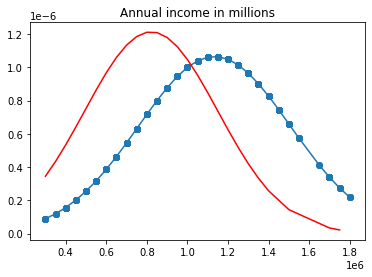

In [46]:
continuous_graph('AnnualIncome' , 'Annual income in millions')

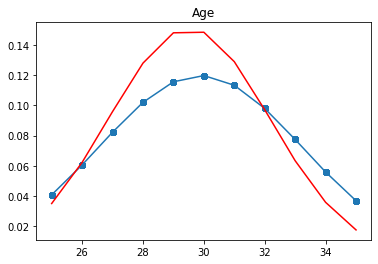

In [47]:
continuous_graph('Age' , 'Age')

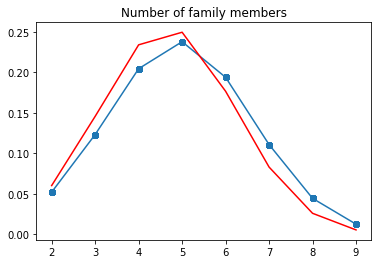

In [50]:
continuous_graph('FamilyMembers' , 'Number of family members')

In [61]:
#x = data.drop(columns=['TravelInsurance'] , axis = 1) 
#y = data['TravelInsurance']
#x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=5)

**Gaussian Naive Bayes**

In [70]:

# Using a built in Naive Bayes function

def GaussNB(run_data):

    x = run_data.drop(columns=['TravelInsurance'] , axis = 1) 
    y = run_data['TravelInsurance']
    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5) 

    model = GaussianNB(var_smoothing = 0.356)  #Choice of smoothing because this yields maximum accuracy for k-fold accuracy
    # fit the model with the training data
    model.fit(x_train,y_train)


    # Predict target on test dataset (which is 25 percent of the train)
    predict_test = model.predict(x_test)

    #Accuracy of test dataset, for comparison
    accuracy_test = accuracy_score(y_test , predict_test)
    print('accuracy_score on test dataset without k-fold CV: ', accuracy_test)

    from sklearn.model_selection import cross_val_score
    print('Accuracy after k-fold CV ' , sum(cross_val_score(model, x_train, y_train, cv=5)/5)) 

    # Adding a confusion matrix for illustration, this for the testing set
    cm = confusion_matrix(y_test, predict_test) 
    print('The Confusion Matrix') 
    print(cm) 

 

In [63]:
GaussNB(data)

accuracy_score on test dataset without k-fold CV:  0.8015075376884422
Accuracy after k-fold CV  0.7766025831795728
[[256   5]
 [ 74  63]]


In [64]:
GaussNB(continuous_data)

accuracy_score on test dataset without k-fold CV:  0.8015075376884422
Accuracy after k-fold CV  0.7766025831795728
[[256   5]
 [ 74  63]]


In [51]:
def get_accuracy(smoothing , run_data):
  x = run_data.drop(columns=['TravelInsurance'] , axis = 1) 
  y = run_data['TravelInsurance']
  x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5) 

  model = GaussianNB(var_smoothing=smoothing)

  model.fit(x_train,y_train)

  # Predict target on test dataset (which is 25 percent of the train)
  predict_test = model.predict(x_test)

  from sklearn.model_selection import cross_val_score
  accuracy = sum(cross_val_score(model, x_train, y_train, cv=5))/5  

  #Accuracy of test dataset, for comparison
  #accuracy_test = accuracy_score(y_test , predict_test)

  return accuracy

In [65]:
print(get_accuracy(0.356 , data))

0.7766025831795728


In [66]:
print(get_accuracy(0.356 , continuous_data))

0.7766025831795728


Producing results from dataset

In [69]:
from sklearn.metrics import precision_recall_fscore_support

x = continuous_data.drop(columns=['TravelInsurance'] , axis = 1) 
y = continuous_data['TravelInsurance']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5) 

model = GaussianNB(var_smoothing=0.356)

model.fit(x_train,y_train)

# Predict target on test dataset (which is 20 percent of the train)
predict_test = model.predict(x_test)

from sklearn.model_selection import cross_val_score
accuracy = sum(cross_val_score(model, x_train, y_train, cv=5))/5  

y_test_model = model.fit(x_train, y_train).predict(x_test)
y_train_model = model.fit(x_test, y_test).predict(x_train)
print(accuracy_score(y_train, y_train_model), accuracy_score(y_test, y_test_model))
print(precision_recall_fscore_support(y_train, y_train_model, zero_division=1))
print(precision_recall_fscore_support(y_test, y_test_model, zero_division=0))

0.7702957835116425 0.8015075376884422
(array([0.76441917, 0.79050279]), array([0.9261811, 0.4938918]), array([0.83756119, 0.60794844]), array([1016,  573]))
(array([0.77575758, 0.92647059]), array([0.98084291, 0.45985401]), array([0.86632826, 0.61463415]), array([261, 137]))


Now I want to create a graph showing how the accuracy for the test set changes with varying var_smoothing. The var_smoothing is how far away from the gauss distribution we choose to include values. 

The 5-fold CV accuracy is used.

The highest accuracy is found at var_smoothing =  0.356


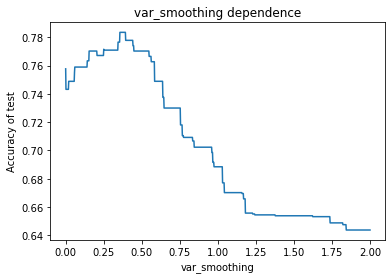

In [68]:
x_of_var = np.linspace(0 , 2 , 1000)
y_of_var = []

for i in x_of_var:
  y_of_var.append(get_accuracy(i , continuous_data))

#Finding the smoothing val of the highest accuracy score
max_accuracy = max(y_of_var)
index = y_of_var.index(max_accuracy)
print('The highest accuracy is found at var_smoothing = ' , round(x_of_var[index] , 3)) 

plt.plot(x_of_var , y_of_var)
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy of test')
plt.title('var_smoothing dependence')
plt.show()